# The Influence of Building Shapes and Glazing on Energy Loads

In this project, we will be predicting building heating and cooling loads with respect to 8 building features.  The buildings differ with respect to shape, glazing area, the glazing area distribution, and orientation.  To acquire the data, an energy analysis was performed using 12 different building shapes to estimate the heating and cooling loads. The simulations were performed in the city of Athens, Greece.

Different settings were simulated with the 8 building features to obtain a total of 768 shapes.  The goal is to use these features to predict the [thermal energy load](https://www.energy.gov/energysaver/heat-and-cool) for each building shape. The features are:

- relative compactness - volume divided by the (surface area * 1.53). Usually the more compact the building is, the taller and more narrow it is.
- surface area - in meters squared. Includes wall areas + roof area + floor area
- wall area - in meters squared
- roof area - in meters squared
- overall height - in meters
- orientation - 2: North, 3: East, 4: South, 5: West
- glazing area - as a percentage of the floor area - 0%, 10%, 25%, and 40%
- glazing area distribution: 
    - 0: uniform - with 25% glazing on each side
    - 1: north - 55% on the north side and 15% on each of the other sides
    - 2: east - 55% on the east side and 15% on each of the other sides
    - 3: south - 55% on the south side and 15% on each of the other sides
    - 4: west - 55% on the west side and 15% on each of the other sides
- the heating and cooling loads listed in kWh/m2.

12 buildings were modeled with different shapes, surface areas and dimensions.  The overall volume was kept the same for each building at 772 meters cubed.  Considering twelve building forms with three glazing area variations, six glazing area distributions each (5 distributions + 1 with no glazing), for four orientations, we obtain 12 × 3 × 6 × 4 = 768 different building variations. 

Building thermal properties, such as solar heat transfer coefficient for the glass and U-values for the walls, floors and roofs, are assumed to be constant and are not part of this analysis.

The dataset, which can be found [here](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency) was donated to the University of California at Irving.

The performance of the model for successfully predicting the outcome will be evaluated using the Root Mean Squared Error [(RMSE)](https://www.statisticshowto.datasciencecentral.com/rmse/). It measures how close the predictions are close to the real values. We want to achieve a low RMSE.  The lower this value, the better the model fits the data.

### Importing Python Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline

### Creating a Dataframe with The Data

In [2]:
data = pd.read_csv('Energy data.csv')

In [3]:
data.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height',
                'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']

### Table of Building Features

In [4]:
data.head(20)

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


To simplify this analysis, we'll sum the heating and cooling load into a new column called "energy load". Then we'll eliminate the heating and cooling load columns.

In [5]:
data_new = data.copy()

In [6]:
data_new['energy load'] = data['heating_load'] + data['cooling_load']

In [7]:
data_new = data_new.drop(columns=['heating_load', 'cooling_load'])

### New Table of Building Features

In [8]:
data_new.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,energy load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,36.88
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,36.88
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,36.88
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,36.88
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,49.12


### Statistical Description for Each Variable

In [9]:
data_new.describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,energy load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,46.894961
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,19.484947
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,16.950000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,28.750000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,40.970000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,64.335000
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,89.950000


### Linear Correlation Between Variables

In [10]:
# Setting the format for diplaying the correlation table
pd.set_option('display.float_format', lambda x: '{:,.3f}'.format(x))

In [11]:
data_new.corr().sort_values('energy load', ascending=False)

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,energy load
energy load,0.632,-0.669,0.445,-0.867,0.898,0.006,0.241,0.070,1.000
overall_height,0.828,-0.858,0.281,-0.973,1.000,0.000,0.000,0.000,0.898
relative_compactness,1.000,-0.992,-0.204,-0.869,0.828,0.000,0.000,0.000,0.632
wall_area,-0.204,0.196,1.000,-0.292,0.281,0.000,-0.000,0.000,0.445
glazing_area,0.000,0.000,-0.000,-0.000,0.000,0.000,1.000,0.213,0.241
glazing_area_distribution,0.000,-0.000,0.000,-0.000,0.000,0.000,0.213,1.000,0.070
orientation,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.006
surface_area,-0.992,1.000,0.196,0.881,-0.858,0.000,0.000,-0.000,-0.669
roof_area,-0.869,0.881,-0.292,1.000,-0.973,0.000,-0.000,-0.000,-0.867


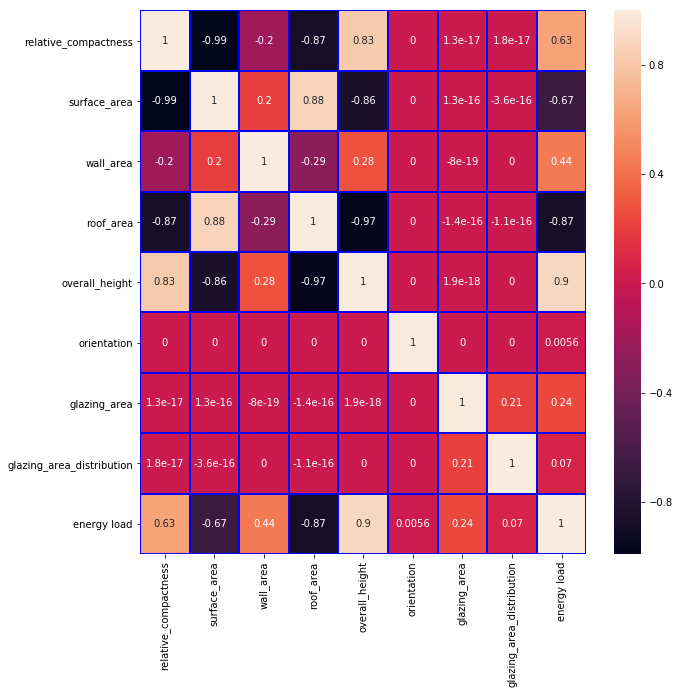

In [12]:
plt.figure(figsize = (10,10))
sns.heatmap(data_new.corr(), annot=True, linewidths=1, linecolor='blue');

Correlation shows how features are related to each other using a linear relationship between variables. The higher the number, the stronger the correlation.  For example, in the figure above, overall height of a building is the strongest variable linearly-correlated to energy load. The taller the building, the larger the energy load.

The problem with using this method is that it is not able to accurately determine the correlation between variables if there is a non-linear dependency.  And these variables are not linearly-dependent with the energy load. However, it is possible to compare height, compactness, and areas since there are linear relationship between them.

To determine the correlation with the energy load, a better metric to use is called *feature importance*, which we will determine after the model is built.

On to the model.

## Predictive Modeling

In [13]:
# The dependent variable --> Energy Load
y = data_new['energy load'] 

In [14]:
# The independent variables --> Building features
X = data_new.drop(columns='energy load')
X.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution
0,0.980,514.500,294.000,110.250,7.000,2,0.000,0
1,0.980,514.500,294.000,110.250,7.000,3,0.000,0
2,0.980,514.500,294.000,110.250,7.000,4,0.000,0
3,0.980,514.500,294.000,110.250,7.000,5,0.000,0
4,0.900,563.500,318.500,122.500,7.000,2,0.000,0


### Train/ Test Split

The data will be split into a training set to train the model, and a testing set to test how accurate the training was.  80% of the data will be used to train the model and 20% of the data will be used to test it.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

### Training

The model will be trained using a [random forest regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html). This is an [ensemble technique](https://en.wikipedia.org/wiki/Ensemble_learning) for regression that uses multiple [decision trees](https://www.lucidchart.com/pages/decision-tree) and [bootstrap aggregating](https://en.wikipedia.org/wiki/Bootstrap_aggregating) or bagging. Bagging involves training several decision trees on different data samples, and then aggregating or combining those samples into one final output.  This technique allows the model to generalize its predictions better for new data that it has not seen.

For our model we will use 100 decision trees (see below: n_estimators=100).

In [16]:
model = RandomForestRegressor(n_estimators=100, random_state=23)

In [17]:
# Fitting the random forest regressor model to the training set data
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=23, verbose=0, warm_start=False)

In [18]:
# Using the fit model to make energy load predictions using the test data building features
predictions = model.predict(X_test)

### Visualizing the Results

Now we'll plot a graph to show how close where our predicted values to the actual values in the test set.  The predicted values where determined by the model above ("predictions"), and the actual values are the energy loads from the test set (y_test).

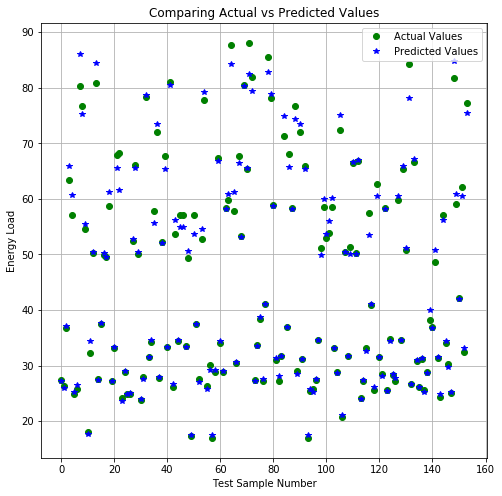

In [19]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(range(0,len(X_test)), y_test.values, 'o', color='green', label = 'Actual Values')
ax.plot(range(0,len(X_test)), predictions, '*', color='blue', label = 'Predicted Values')
ax.set_xlabel('Test Sample Number')
ax.set_ylabel('Energy Load')
ax.set_title('Comparing Actual vs Predicted Values')
ax.legend(loc = 'upper right')

plt.grid()
plt.show()

We can see the predicted values are very close to the actual values. From the graph it appears that the model is more accurate at predicting lower energy loads vs higher.

### Statistical Metric RMSE

The root mean squared error is a measure of how far the predictions errors are from the regression line. The lower this value, the more accurate was the model at predicting the right outcome.

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
mean_squared_error()

TypeError: mean_squared_error() missing 2 required positional arguments: 'y_true' and 'y_pred'

In [ ]:
#RMSE = sqrt(MSE)
np.sqrt(mean_squared_error(y_test, predictions))

The RMSE for predicting the energy load is 1.6 kWh/m. Being that the average energy load is 46.9 kWh/m, the prediction error is only 3.4% when compared to the average load.  Thus, the Random Forest Regressor was a good strategy to use for training the model.

### Feature Importance

In [ ]:
# Table of feature importance
for feature in zip(data_new.columns, model.feature_importances_):
    print(feature)

In [ ]:
# Plotting the feature importance
feat_series = pd.Series(model.feature_importances_, index=X.columns)
feat_series.nlargest(8).plot(kind='barh')
plt.show()

After training the model, relative compactness is the most important feature for predicting the heating and cooling load of a building.  The glazing area distribution and orientation are relatively unimportant.

The higher the feature importance score, the more relevant the feature is to the output variable. In this case the output is energy load.

Lets plot how the energy load varies due to building relative compactness

In [ ]:
data_new.plot(kind='scatter', x="relative_compactness", y="energy load", figsize=(9,6), grid=True);

A building relative compactness of around 0.78 produces the highest energy loads.  And in general, buildings with low relative compactness (large surface area), generally shorter, flatter, longer buildings, have a lower thermal energy load and require less heating and cooling.

Please note that this statistical analysis is only valid for buildings in Athens, Greece and with specific building materials held constant throughout the analysis.  If one were to use another city and different building thermal properties, then relative compactness might not be the most important feature and its relationship to energy load would be different.